In [1]:
from nltk.corpus import stopwords

Stop words


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
sample_text = "the great aim of education is not knowledge but action"

In [4]:
sample_words = sample_text.split()
print(sample_words)

['the', 'great', 'aim', 'of', 'education', 'is', 'not', 'knowledge', 'but', 'action']


In [5]:
sample_words = [word for word in sample_words if word not in stopwords.words('english')]
print(sample_words)

['great', 'aim', 'education', 'knowledge', 'action']


In [6]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Tokenization

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
document = "At nine o'clock I visited him myself. It looks like religious mania, and he'll soon think that he himself is God thanks 123 its a great number ."


In [9]:
words = word_tokenize(document)

In [10]:
print(words)

['At', 'nine', "o'clock", 'I', 'visited', 'him', 'myself', '.', 'It', 'looks', 'like', 'religious', 'mania', ',', 'and', 'he', "'ll", 'soon', 'think', 'that', 'he', 'himself', 'is', 'God', 'thanks', '123', 'its', 'a', 'great', 'number', '.']


In [11]:
from nltk.tokenize import sent_tokenize
sentences = sent_tokenize(document)
print(sentences)

["At nine o'clock I visited him myself.", "It looks like religious mania, and he'll soon think that he himself is God thanks 123 its a great number ."]


In [12]:
message = "i recently watched this show called mindhunters:). i totally loved it 😍. it was gr8 <3. #bingewatching #nothingtodo 😎"
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()
print(tknzr.tokenize(message))

['i', 'recently', 'watched', 'this', 'show', 'called', 'mindhunters', ':)', '.', 'i', 'totally', 'loved', 'it', '😍', '.', 'it', 'was', 'gr8', '<3', '.', '#bingewatching', '#nothingtodo', '😎']


In [13]:
from nltk.tokenize import regexp_tokenize
message = "i recently watched this show called mindhunters:). i totally loved it 😍. it was gr8 <3. #bingewatching #nothingtodo 😎"
pattern = "#[\w]+"

In [14]:
regexp_tokenize(message, pattern)

['#bingewatching', '#nothingtodo']

Bag of Words

In [15]:
documents = ["Gangs of Wasseypur is a great movie.", "The success of a movie depends on the performance of the actors.", "There are no new movies releasing this week."]
print(documents)

['Gangs of Wasseypur is a great movie.', 'The success of a movie depends on the performance of the actors.', 'There are no new movies releasing this week.']


In [16]:
def preprocess(document):
    'changes document to lower case and removes stopwords'

    # change sentence to lower case
    document = document.lower()

    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]

    # join words to make sentence
    document = " ".join(words)

    return document

In [17]:
documents = [preprocess(document) for document in documents]
print(documents)

['gangs wasseypur great movie .', 'success movie depends performance actors .', 'new movies releasing week .']


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [19]:
vectorizer = CountVectorizer()
bow_model = vectorizer.fit_transform(documents)
print(bow_model)

  (0, 2)	1
  (0, 10)	1
  (0, 3)	1
  (0, 4)	1
  (1, 4)	1
  (1, 9)	1
  (1, 1)	1
  (1, 7)	1
  (1, 0)	1
  (2, 6)	1
  (2, 5)	1
  (2, 8)	1
  (2, 11)	1


In [20]:
# print the full sparse matrix
print(bow_model.toarray())

[[0 0 1 1 1 0 0 0 0 0 1 0]
 [1 1 0 0 1 0 0 1 0 1 0 0]
 [0 0 0 0 0 1 1 0 1 0 0 1]]


In [21]:
print(bow_model.shape)
print(vectorizer.get_feature_names_out())

(3, 12)
['actors' 'depends' 'gangs' 'great' 'movie' 'movies' 'new' 'performance'
 'releasing' 'success' 'wasseypur' 'week']


In [22]:
pd.DataFrame(bow_model.toarray(), columns = vectorizer.get_feature_names_out())

,actors,depends,gangs,great,movie,movies,new,performance,releasing,success,wasseypur,week
0,0,0,1,1,1,0,0,0,0,0,1,0
1,1,1,0,0,1,0,0,1,0,1,0,0
2,0,0,0,0,0,1,1,0,1,0,0,1


Stemming and Lemmitization

In [23]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [24]:
text = "Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire."
print(text)

Very orderly and methodical he looked, with a hand on each knee, and a loud watch ticking a sonorous sermon under his flapped newly bought waist-coat, as though it pitted its gravity and longevity against the levity and evanescence of the brisk fire.


In [25]:
# tokenise text
tokens = word_tokenize(text)

In [26]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized = [wordnet_lemmatizer.lemmatize(token) for token in tokens]
print(lemmatized)

['Very', 'orderly', 'and', 'methodical', 'he', 'looked', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'ticking', 'a', 'sonorous', 'sermon', 'under', 'his', 'flapped', 'newly', 'bought', 'waist-coat', ',', 'a', 'though', 'it', 'pitted', 'it', 'gravity', 'and', 'longevity', 'against', 'the', 'levity', 'and', 'evanescence', 'of', 'the', 'brisk', 'fire', '.']


In [27]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stemmed = [stemmer.stem(token) for token in tokens]
print(stemmed)

['veri', 'orderli', 'and', 'method', 'he', 'look', ',', 'with', 'a', 'hand', 'on', 'each', 'knee', ',', 'and', 'a', 'loud', 'watch', 'tick', 'a', 'sonor', 'sermon', 'under', 'hi', 'flap', 'newli', 'bought', 'waist-coat', ',', 'as', 'though', 'it', 'pit', 'it', 'graviti', 'and', 'longev', 'against', 'the', 'leviti', 'and', 'evanesc', 'of', 'the', 'brisk', 'fire', '.']


In [28]:
import pandas as pd
df = pd.DataFrame(data={'token': tokens, 'stemmed': stemmed, 'lemmatized': lemmatized})
df = df[['token', 'stemmed', 'lemmatized']]
df[(df.token != df.stemmed) | (df.token != df.lemmatized)]

,token,stemmed,lemmatized
0,Very,veri,Very
1,orderly,orderli,orderly
3,methodical,method,methodical
5,looked,look,looked
18,ticking,tick,ticking
20,sonorous,sonor,sonorous
23,his,hi,his
24,flapped,flap,flapped
25,newly,newli,newly
29,as,as,a


TF-IDF

<Axes: >

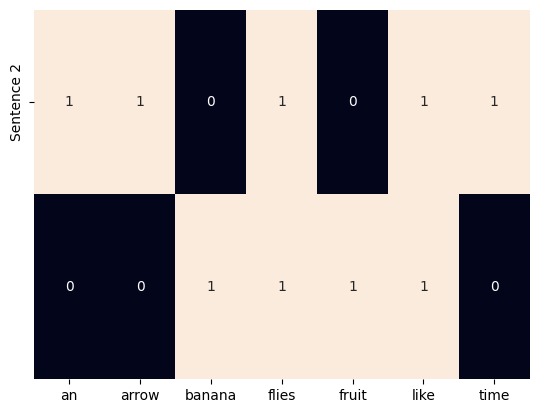

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

corpus = ['Time flies flies like an arrow.',
          'Fruit flies like a banana.']
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
xticklabels = one_hot_vectorizer.get_feature_names_out()
sns.heatmap(one_hot, annot=True,
            cbar=False, xticklabels=xticklabels,
            yticklabels=['Sentence 2'])

<Axes: >

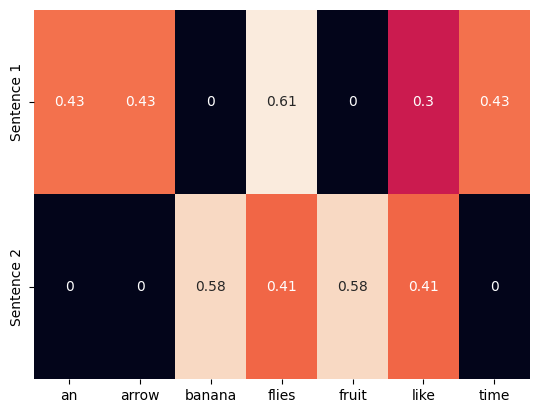

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
xticklabels = one_hot_vectorizer.get_feature_names_out()
sns.heatmap(tfidf, annot=True, cbar=False, xticklabels=xticklabels,
            yticklabels= ['Sentence 1', 'Sentence 2'])

POS

In [32]:
import spacy

In [33]:
model = spacy.load("en_core_web_sm")

In [34]:
word = "Today is raining here"
tokens = model(word)

In [35]:
for token in tokens:
  print(token.text , "--" , token.pos_ , "--", token.tag_)

Today -- NOUN -- NN
is -- AUX -- VBZ
raining -- VERB -- VBG
here -- ADV -- RB


In [39]:
import spacy

nlp = spacy.load('en_core_web_sm')
#import en_core_web_trf
#nlp = en_core_web_trf.load()

sentence = "Apple is looking at buying U.K. startup for $1 billion"
sentence = "Apple and Mango is tastier fruits than goa"
doc = nlp(sentence)

for ent in doc.ents:
	print(ent.text, ent.start_char, ent.end_char, ent.label_)


Apple 0 5 ORG
Mango 10 15 LOC


In [40]:
import spacy

nlp = spacy.load('en_core_web_sm')

sentence = "i eat an apple every day"

doc = nlp(sentence)

for ent in doc.ents:
	print(ent.text, ent.start_char, ent.end_char, ent.label_)

In [41]:
import spacy

nlp = spacy.load('en_core_web_sm')

sentence = "John Peterson is a great man"

doc = nlp(sentence)

for ent in doc.ents:
	print(ent.text, ent.start_char, ent.end_char, ent.label_)

John Peterson 0 13 PERSON


In [ ]:
!python -m spacy download en_core_web_trf

2023-11-25 03:13:49.690165: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 03:13:49.690235: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 03:13:49.690274: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 03:13:50.919037: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.8/190.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 50.5 MB/s eta 0:0

KNowledge Graph

In [42]:
from nltk import download

In [43]:
download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
from nltk.corpus import wordnet

In [45]:
# Synsets

tractor = wordnet.synsets('bike')
tractor

[Synset('motorcycle.n.01'), Synset('bicycle.n.01'), Synset('bicycle.v.01')]

In [46]:
[syn.definition() for syn in tractor]

['a motor vehicle with two wheels and a strong frame',
 'a wheeled vehicle that has two wheels and is moved by foot pedals',
 'ride a bicycle']

In [47]:
tractor = wordnet.synset('motorcycle.n.01')
tractor.hypernyms()

[Synset('motor_vehicle.n.01')]

In [48]:
self_propelled_vehicle = wordnet.synset('motor_vehicle.n.01')
self_propelled_vehicle.hypernyms()

[Synset('self-propelled_vehicle.n.01')]

In [49]:
wheeled_vehicle = wordnet.synset('self-propelled_vehicle.n.01')
wheeled_vehicle.part_meronyms()

[]

In [50]:
wheeled_vehicle.hyponyms()

[Synset('armored_vehicle.n.01'),
 Synset('carrier.n.02'),
 Synset('forklift.n.01'),
 Synset('locomotive.n.01'),
 Synset('motor_vehicle.n.01'),
 Synset('personnel_carrier.n.01'),
 Synset('reconnaissance_vehicle.n.01'),
 Synset('recreational_vehicle.n.01'),
 Synset('streetcar.n.01'),
 Synset('tracked_vehicle.n.01'),
 Synset('tractor.n.01'),
 Synset('weapons_carrier.n.01')]